#### Importing libs and data

In [3]:
import pandas as pd
import seaborn as sns
# Adding the grid lines so the values in the graphs are easier to comprehend 
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 

concatenated_data = pd.DataFrame()

for year in range(2015, 2024):
    filename = f'C:/Users/Admin/Desktop/WHR_{year}.csv'
    data = pd.read_csv(filename)
    data['year'] = year
    concatenated_data = pd.concat([concatenated_data, data], ignore_index=True)
    
concatenated_data.to_csv('WHR_concatenated.csv', index=False)
concatenated_data.to_csv('WHR_concatenated_with_year.csv', index=False)
data= pd.read_csv('C:/Users/Admin/Desktop/WHR_concatenated_with_year.csv')

#### Cleaning data

In [4]:
#check for any NULLs in the data and see data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [5]:
data.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [6]:
# Fill missing values with the average value
data['perceptions_of_corruption'] = data.groupby('country')['perceptions_of_corruption'].transform(lambda x: x.fillna(x.mean()))
data['healthy_life_expectancy'] = data.groupby('region')['healthy_life_expectancy'].transform(lambda x: x.fillna(x.mean()))

In [7]:
data.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

#### Data describing

In [8]:
data.head()
# This shows us the top of our data set, which in the case is the top 5 from the year 2015

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [15]:
data.region.unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeast Asia', 'Central and Eastern Europe', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia', 'Africa'], dtype=object)

In [18]:
data[data.region == 'North America and ANZ'].describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,7.176058,1.501825,1.351809,0.817846,0.605989,0.336199,0.306796,2019.000000
std,0.157204,0.230305,0.184137,0.154570,0.058686,0.092193,0.104643,2.618615
min,6.886000,1.242318,1.030000,0.390000,0.454000,0.210000,0.128000,2015.000000
25%,7.077500,1.338395,1.186500,0.777822,0.565528,0.256500,0.259779,2017.000000
50%,7.225400,1.419353,1.427656,0.831289,0.617970,0.322987,0.320155,2019.000000
75%,7.301450,1.536315,1.499000,0.906315,0.651680,0.416962,0.371000,2021.000000
max,7.427000,1.982000,1.601000,1.039000,0.680000,0.500005,0.483000,2023.000000


Below is a list of all the countries combinded happiness scores from each year to see who had the largest sum for their hapiness score. 

#### Visualization

Overall trend in Happiness Score across the year

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('World Trend of Happiness Score')
sns.lineplot(data=data, x='year', y='happiness_score', err_style=None)
plt.show()

Из данного графика мы видим, что самый низкий показатель счастья был зафиксирован в 2017 году, а самым счастливым годом стал 2022 год, когда мир снова начал открываться после пандемии covid.

#### Top the happiest countries

In [ ]:
total_happiness_score = data.groupby('country').agg({'happiness_score': 'mean', 'gdp_per_capita': 'mean'}).reset_index()
total_happiness_score = total_happiness_score.sort_values(by='happiness_score', ascending=False)
total_happiness_score = total_happiness_score.reset_index(drop=True)
total_happiness_score.index = range(1, len(total_happiness_score) + 1)
total_happiness_score.head(20)

In [ ]:
#top 10 countries based on their average ['happiness_score'] from all the years
mean_happiness_by_country = data.groupby('country')['happiness_score'].mean()
mean_happiness_by_country = mean_happiness_by_country.sort_values(ascending=False).head(10)

plt.bar(mean_happiness_by_country.index, mean_happiness_by_country, color=plt.cm.viridis(np.linspace(0, 1, len(mean_happiness_by_country))), edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Happiness Score Top 10")
plt.xticks(rotation=45)
plt.show()

Ключевые наблюдения:

- 70% стран, входящих в топ-20, являются европейскими, а 4 из топ-5 относятся к скандинавским странам. 
- Норвегия и Швейцария входят в топ-10 стран, если сравнивать их средний ВВП на душу населения за те же годы.

Культурные аспекты стран Северной Европы, которые могли повлиять: датский hygge (наслаждение мелочами и уютным времяпрепровождением с близкими) и шведский fika (перерыв в течение дня, чтобы выпить кофе и пообщаться с друзьями).

#### Finland analysis

In [ ]:
finland_data = data[data['country'] == 'Finland']
happiness_score_by_year = finland_data.groupby('year')['happiness_score'].mean()

plt.bar(happiness_score_by_year.index, happiness_score_by_year,edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score for Finland 2015-2023")
plt.xticks(rotation=50)
plt.ylim(5, 8)
plt.show()

В Финляндии наблюдается устойчивый рост показателя ['happiness_score']. В 2021 году он достиг своего максимального значения - 7,842 и в течение следующих двух лет оставался выше 7,8.

In [61]:
Finland_data = data[data['country']== 'Finland']
Finland_data = Finland_data[['country','happiness_score','year','gdp_per_capita','social_support','freedom_to_make_life_choices',
                          'generosity', 'healthy_life_expectancy']]
Finland_data = Finland_data.set_index('year', inplace=False)
Finland_data

,country,happiness_score,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,healthy_life_expectancy
year,,,,,,,
2015,Finland,7.4060,1.290250,1.318260,0.641690,0.233510,0.889110
2016,Finland,7.4130,1.405980,1.134640,0.571040,0.254920,0.810910
2017,Finland,7.4690,1.443572,1.540247,0.617951,0.245483,0.809158
2018,Finland,7.6320,1.305000,1.592000,0.681000,0.202000,0.874000
2019,Finland,7.7690,1.340000,1.587000,0.596000,0.153000,0.986000
2020,Finland,7.8087,1.285190,1.499526,0.662317,0.159670,0.961271
2021,Finland,7.8420,1.446000,1.106000,0.691000,0.124000,0.741000
2022,Finland,7.8210,1.892000,1.258000,0.736000,0.109000,0.775000
2023,Finland,7.8040,1.888000,1.585000,0.772000,0.126000,0.535000


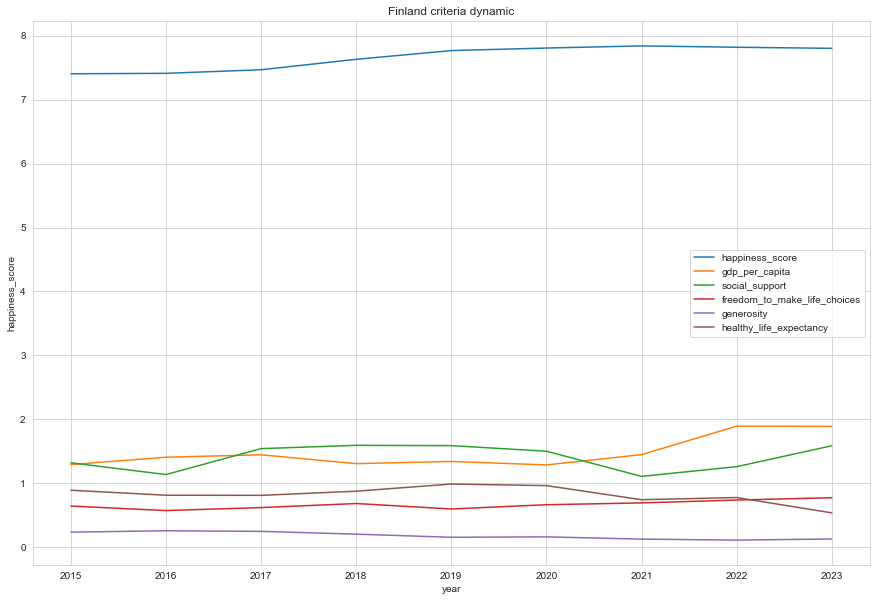

In [70]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Finland criteria dynamic')
sns.lineplot(data=Finland_data, x='year', y='happiness_score', err_style=None, label = 'happiness_score')
sns.lineplot(data=Finland_data, x='year', y='gdp_per_capita', err_style=None, label = 'gdp_per_capita')
sns.lineplot(data=Finland_data, x='year', y='social_support', err_style=None, label = 'social_support')
sns.lineplot(data=Finland_data, x='year', y='freedom_to_make_life_choices', err_style=None, label = 'freedom_to_make_life_choices')
sns.lineplot(data=Finland_data, x='year', y='generosity', err_style=None, label = 'generosity')
sns.lineplot(data=Finland_data, x='year', y='healthy_life_expectancy', err_style=None, label = 'healthy_life_expectancy')
plt.legend()
plt.show()

#### Ключевые наблюдения

- ВВП Финляндии на душу населения вырос с 2015 по 2023 год. В 2020 году они, похоже, боролись с пандемией COVID-19.

- Финляндия имеет достаточно развитую систему социальной поддержки.

- Финляндия - либеральная страна, и, как мы видим, ее граждане обладают свободой в своей жизни.

- По мере увеличения показателя счастья уровень их щедрости снижается. Это может быть связано с финансовой неопределенностью после пандемии COVID-19.

#### Countries with the highest average GDP per capita

In [128]:
total_happiness_score = data.groupby('country').agg({'gdp_per_capita': 'mean', 'happiness_score': 'mean'}).reset_index()
total_happiness_score = total_happiness_score.sort_values(by='gdp_per_capita', ascending=False)
total_happiness_score = total_happiness_score.reset_index(drop=True)
total_happiness_score.index = range(1, len(total_happiness_score) + 1)
total_happiness_score.head(10)

,country,gdp_per_capita,happiness_score
1,Czechia,1.819000,6.882500
2,Luxembourg,1.765006,7.097056
3,Qatar,1.743691,6.421800
4,Singapore,1.721363,6.503900
5,Turkiye,1.714000,4.614000
6,United Arab Emirates,1.691691,6.691089
7,Ireland,1.630440,6.994744
8,Norway,1.617235,7.473889
9,Switzerland,1.596177,7.493322
10,United States,1.572080,6.972844


7 из 10 стран, входящих в первую десятку по показателю ВВП на душу населения, также занимают высокое место в нашем общем рейтинге счастья. Это подразумевает значительную корреляцию между богатством страны и ее общим показателем счастья. Однако существуют исключения. Например, в Турции уровень счастья ниже среднего, но, что удивительно, она занимает 5-е место в нашем рейтинге.

#### Check for correlation between the metrics

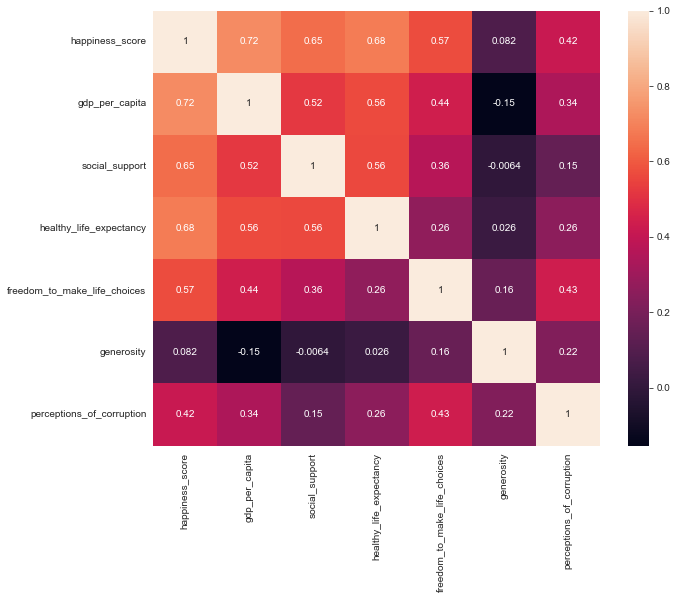

In [78]:
data_num = data.select_dtypes('number')
data_num = data_num.drop(['year'], axis=1)
corr = data_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

При анализе корреляции выявлена положительная корреляция между ВВП на душу населения и показателем счастья. Кроме того, обращает на себя внимание отрицательная корреляция между щедростью и ВВП на душу населения и социальной поддержкой.

#### Comparing the top 10 and bottom 10 countries

In [98]:
Happiest10 = data.groupby('country').agg({'social_support': 'mean', 'happiness_score': 'mean','gdp_per_capita': 'mean','healthy_life_expectancy':'mean','freedom_to_make_life_choices':'mean','generosity':'mean','perceptions_of_corruption':'mean'}).reset_index().sort_values(by= 'happiness_score', ascending= False)[:10]
LeastHappiest10 = data.groupby('country').agg({'social_support': 'mean', 'happiness_score': 'mean','gdp_per_capita': 'mean','healthy_life_expectancy':'mean','freedom_to_make_life_choices':'mean','generosity':'mean','perceptions_of_corruption':'mean'}).reset_index().sort_values(by= 'happiness_score', ascending= False)[-10:]

In [99]:
def plotly_bars(data, x, y, title, color, xlabel, ylabel):
    """
    Create and display a Plotly bar chart.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        title (str): The title of the plot.
        color (str): The column name for color differentiation.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.

    Returns:
        None
    """

    fig = px.bar(data, x, y, title=title, color=color, text_auto=True, width=1400, height=500, labels={'country': xlabel, 'y': ylabel})
    return fig.show()

#### Average Happiness Scores (2015-2023)

In [100]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['happiness_score'].round(2), 'Top 10 happiness score countries', Happiest10['country'], 'Country', 'Happiness score')

In [101]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['happiness_score'].round(2), 'Lowest 10 happiness score countries', LeastHappiest10['country'], 'Country', 'Happiness score')

Видим, что среди 10 самых счастливых стран страны преимущественно из Западной Европы, Северной Америки и Южной Африки, в то время как 10 наименее счастливых стран сосредоточены в регионах Африки и Ближнего Востока, за исключением Афганистана в Южной Азии.

#### Average Social Support Scores (2015-2023)

In [105]:
#average social_support across the whole dataset
print('Social Support Average Score: ' + str(data.social_support.mean()))

Social Support Average Score: 1.045334121149232


In [106]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['social_support'].round(2), 'Happiest 10 happiness score countries (Social Score)', Happiest10['country'], 'Country', 'Social Support score')

In [107]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['social_support'].round(2), 'Lowest 10 happiness score countries (Social Support)', LeastHappiest10['country'], 'Country', 'Social Support score')

Выявлена тенденция: все страны, входящие в категорию "менее счастливые", имеют уровень социальной поддержки ниже среднего (1,045334), за исключением Ботсваны, которая находится в небольшом отрыве. И наоборот, в топ-10 самых счастливых стран показатели социальной поддержки неизменно превышают средние показатели, что указывает на заметную связь между социальной поддержкой и общим уровнем счастья наций и отдельных людей.

#### Average GDP per Capita Scores (2015-2023)

In [109]:
print ('Average GDP per Capita ' + str(data.gdp_per_capita.mean()))
print ('Max GDP per Capita ' + str(data.gdp_per_capita.max()))
print ('Median GDP per Capita ' + str(data.gdp_per_capita.median()))

Average GDP per Capita 1.019422176543526
Max GDP per Capita 2.209
Median GDP per Capita 1.043


In [110]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['gdp_per_capita'].round(2), 'Top 10 Happiest Countries score (GDP per Capita)', Happiest10['country'], 'Country', 'GDP per Capita score')

In [111]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['gdp_per_capita'].round(2), 'Top 10 Least Happiest Countries score (GDP per Capita)', LeastHappiest10['country'], 'Country', 'GDP per Capita score')

Замеченная тенденцию: показатели ВВП на душу населения в странах, относящихся к категории "менее благополучных", неизменно ниже среднего показателя в 1,01942, за исключением Ботсваны. С другой стороны, 10 самых счастливых стран имеют довольно схожие показатели ВВП на душу населения, все они выше среднего показателя. Это указывает на интересную связь между ВВП на душу населения и общим уровнем счастья наций и отдельных людей.

#### Average Healthy Life Expectancy

In [112]:
print ('Average Healthy Life Expectancy ' + str(data.healthy_life_expectancy.mean().round(3)))
print ('Max Healthy Life Expectancy ' + str(data.healthy_life_expectancy.max()) + ' - the country is Singapore')
print ('Median Healthy Life Expectancy ' + str(data.healthy_life_expectancy.median()))

Average Healthy Life Expectancy 0.584
Max Healthy Life Expectancy 1.141 - the country is Singapore
Median Healthy Life Expectancy 0.613212049


In [113]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['healthy_life_expectancy'].round(2), 'Top 10 Happiest Countries score (Healthy Life Expectancy)', Happiest10['country'], 'Country', 'Healthy Life Expectancy score')

In [114]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['healthy_life_expectancy'].round(2), 'Top 10 Least Happiest Countries score (Healthy Life Expectancy)', LeastHappiest10['country'], 'Country', 'Healthy Life Expectancy score')

Замеченная закономерность: страны, отнесенные к категории менее счастливых, имеют показатели ожидаемой продолжительности здоровой жизни ниже среднего показателя в 0,584 балла. Примечательно, что показатель для Сирии находится чуть ниже этого среднего показателя, что подчеркивает проблемы, связанные с доступом к системам здравоохранения в этих странах. Напротив, 10 самых счастливых стран мира неизменно демонстрируют схожие показатели ожидаемой продолжительности здоровой жизни, превышающие средние показатели. Примечательно, что это страны с своими надежными системами здравоохранения. Это наблюдение наводит на мысль о примечательной корреляции между ожидаемой продолжительностью здоровой жизни и общим уровнем счастья как наций, так и отдельных людей.

#### Average Freedom To Make Life Choices score

In [115]:
print ('Average Freedom To Make Life Choices ' + str(data.freedom_to_make_life_choices.mean().round(3)))
print ('Max Freedom To Make Life Choices ' + str(data.freedom_to_make_life_choices.max()))
print ('Median Freedom To Make Life Choices ' + str(data.freedom_to_make_life_choices.median()))

Average Freedom To Make Life Choices 0.451
Max Freedom To Make Life Choices 0.772
Median Freedom To Make Life Choices 0.46761


In [116]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['freedom_to_make_life_choices'].round(2), 'Top 10 Happiest Countries score (Freedom To Make Life Choices)', Happiest10['country'], 'Country', 'Freedom To Make Life Choices')

In [117]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['freedom_to_make_life_choices'].round(2), 'Top 10 Least Happiest Countries score (Freedom To Make Life Choices)', LeastHappiest10['country'], 'Country', 'Freedom To Make Life Choices')

7 стран, отнесенных к категории менее счастливых, неизменно демонстрируют показатели свободы выбора в жизни ниже среднего значения 0,451. Примечательно, что Ботсвана, Танзания и Руанда отклоняются от этой тенденции, демонстрируя показатели свободы выбора в жизни выше среднего. Эта аномалия может свидетельствовать о том, что люди в этих странах пользуются значительной автономией в формировании своей жизни.

И наоборот, топ-10 самых счастливых стран неизменно демонстрируют схожие показатели по свободе выбора в жизни, и все они превосходят средние показатели. Примечательно, что эти страны известны тем, что предоставляют широкие возможности в области образования и карьерного роста, а их либеральные правительства активно поощряют граждан пользоваться своими свободами. Это наблюдение подразумевает значительную корреляцию между свободой делать жизненный выбор и общим счастьем как наций, так и отдельных людей.

#### Average Generosity score

In [118]:
print ('Average Generosity score ' + str(data.generosity.mean().round(3)))
print ('Max Generoisty score ' + str(data.generosity.max())+ ' the most generous country from the data is Myanmar')
print ('Median Generosity score ' + str(data.generosity.median()))

Average Generosity score 0.196
Max Generoisty score 0.838075161 the most generous country from the data is Myanmar
Median Generosity score 0.1827


In [119]:
most_generous = data.loc[data['generosity'].idxmax()]
most_generous[['country','generosity']]

country        Myanmar
generosity    0.838075
Name: 428, dtype: object

In [120]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['generosity'].round(2), 'Top 10 Happiest Countries score (Generosity)', Happiest10['country'], 'Country', 'Generosity')

In [121]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['generosity'].round(2), 'Top 10 Least Happiest Countries score (Generosity)', LeastHappiest10['country'], 'Country', 'Generosity')

В отличие от наших предыдущих сравнений, самый высокий показатель щедрости был получен в одной из 10 наименее счастливых стран. Сирия оказалась самой щедрой страной, что может свидетельствовать о стойкости и солидарности ее населения в условиях таких проблем, как землетрясение 2023 года и гражданские беспорядки.

Любопытное наблюдение возникает, когда в самой счастливой стране, Финляндии, показатель щедрости ниже среднего. Это вызывает вопросы о факторах, влияющих на это несоответствие. Несмотря на то, что Финляндия может похвастаться высоким уровнем ВВП на душу населения, что свидетельствует о финансовых возможностях для щедрости, инициативы правительства, направленные на удовлетворение потребностей менее обеспеченных слоев населения, могут снизить потребность граждан в индивидуальных благотворительных акциях. Систематическое предоставление жилья и предметов первой необходимости финским правительством потенциально снижает зависимость от индивидуальных благотворительных взносов внутри страны.

#### Average Perception Of Corruption score

In [122]:
print ('Average Perception Of Corruption score ' + str(data.perceptions_of_corruption.mean().round(3)))
print ('Max Perception Of Corruption score ' + str(data.perceptions_of_corruption.max())+ ' The country with the highest trust in their businesses and governments is Singapore')
print ('Median Perception Of Corruption score ' + str(data.perceptions_of_corruption.median()))

Average Perception Of Corruption score 0.132
Max Perception Of Corruption score 0.587 The country with the highest trust in their businesses and governments is Singapore
Median Perception Of Corruption score 0.097


In [123]:
max_corruption = data.loc[data['perceptions_of_corruption'].idxmax()]
max_corruption[['country','perceptions_of_corruption']]

country                      Singapore
perceptions_of_corruption        0.587
Name: 1110, dtype: object

In [124]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['perceptions_of_corruption'].round(2), 'Top 10 Happiest Countries score (Perception Of Corruption)', Happiest10['country'], 'Country', 'Perception Of Corruption')

In [125]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['perceptions_of_corruption'].round(2), 'Top 10 Least Happiest Countries score (Perception Of Corruption)', LeastHappiest10['country'], 'Country', 'Perception Of Corruption')

Более высокие показатели по показателю восприятия коррупции отражают уровень доверия, которое страна оказывает своим предприятиям и правительству. Исследование, проведенное в 10 наименее благополучных странах, показывает общее отсутствие доверия к государственным институтам, за исключением Руанды. Примечательно, что Руанда набрала более высокий балл, чем все страны, входящие в топ-10 самых счастливых стран, что свидетельствует о значительной степени доверия как к ее правительству, так и к бизнесу.

И наоборот, Исландия, которая выделяется среди самых счастливых стран, набрала более низкий балл, чем Сирия, которая пережила значительные потрясения в правительстве. Это расхождение свидетельствует о потенциальном снижении доверия к исландскому бизнесу и правительству. Тонкие различия в этих показателях дают ценную информацию о сложной динамике между общественным доверием и воспринимаемой честностью государственных и коммерческих структур в разных странах.

#### Regional Overview

In [126]:
region = data.groupby('region').happiness_score.mean().reset_index().sort_values(by= 'happiness_score', ascending= False)[:10]

In [127]:
plotly_bars(region, region['region'], region['happiness_score'].round(2), 'AVG happiness score by regions', region['region'], 'Region', 'Happiness score') 

Видим, что самыми счастливыми регионами являются Северная Америка и Юго-Восточная Азия, Западная Европа, Латинская Америка и Карибы, а самые низкие средние показатели счастья - на Ближнем Востоке, в Африке и Южной Азии.